In [1]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical
from sklearn import model_selection
from sklearn import preprocessing
from collections import deque
import random
from numpy import newaxis
import sys
from datetime import date

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [57]:
with open('/content/gdrive/MyDrive/Colab Notebooks/data/modified (1).csv','r') as z:
    df = pd.DataFrame(pd.read_csv(z,infer_datetime_format=True,parse_dates=['TS']))



In [408]:
with open('/content/gdrive/MyDrive/Colab Notebooks/data/modified (1).csv','r') as zo:
    df = pd.DataFrame(pd.read_csv(zo,infer_datetime_format=True,parse_dates=['TS']))

In [409]:
df.head

<bound method NDFrame.head of               TS          V1          V2  ...          W2          W3  Season
0     1481779800  230.459834  232.246458  ...   61.896241    0.106471       1
1     1481794200  232.629286  235.258992  ...   64.306541   38.469765       1
2     1481797800  233.379785  234.766217  ...   12.996327   64.990385       1
3     1481862600  230.026178  230.905907  ...    0.713788    0.502634       1
4     1481866200  229.061954  232.196039  ...   36.306355   37.953893       1
...          ...         ...         ...  ...         ...         ...     ...
4663  1528120800  235.441763  236.377831  ...  105.633668   57.933859       2
4664  1528124400  232.340915  233.185799  ...  204.173027  102.993996       2
4665  1528128000  231.533768  231.922184  ...  164.771038  114.729862       2
4666  1528131600  231.580498  230.829861  ...   55.652969  112.263540       2
4667  1528135200  232.444894  232.742972  ...   72.086230  104.550903       2

[4668 rows x 8 columns]>

In [410]:
df.drop(224,inplace=True)
df.drop(4582,inplace=True)
df.drop(4622,inplace=True)



```
# This is formatted as code
```

df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [363]:
df.info(
  
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322 entries, 0 to 4667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TS      4322 non-null   object 
 1   V1      4322 non-null   float64
 2   V2      4322 non-null   float64
 3   V3      4322 non-null   float64
 4   W1      4322 non-null   float64
 5   W2      4322 non-null   float64
 6   W3      4322 non-null   float64
 7   Season  4322 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 303.9+ KB


,V1,V2,V3,W1,W2,W3,Season
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,235.243726,237.398930,236.708038,182.133579,99.135602,156.335830,1.921795
std,4.227069,4.307357,3.992417,173.874058,102.325114,156.578762,0.357279
min,214.105829,215.297552,215.190582,0.112912,0.105221,0.100397,1.000000
25%,231.922936,234.008750,233.519695,96.537550,31.926906,51.880481,2.000000
50%,235.670818,237.747465,237.140321,134.309157,79.394684,127.010467,2.000000
75%,238.836854,241.006772,240.096200,193.485007,126.276876,198.075779,2.000000
max,243.970296,246.391517,244.849825,1749.115270,1723.826154,1453.336588,3.000000


In [415]:
drp=df.query("W3<10")
drp
ll=drp.index[:]

df.drop(ll,inplace=True)

In [417]:
df.describe()

,V1,V2,V3,W1,W2,W3,Season
count,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000
mean,235.321752,237.496190,236.784338,191.964223,107.675248,164.567138,1.913673
std,4.208735,4.309231,3.982079,174.521567,103.392241,156.168453,0.339249
min,214.105829,215.297552,215.190582,10.408151,10.004110,10.018986,1.000000
25%,232.007843,234.106263,233.617144,102.733298,44.469906,58.804254,2.000000
50%,235.852911,237.930159,237.308992,139.098631,86.065803,136.280240,2.000000
75%,238.928409,241.118592,240.163466,201.601121,132.343568,201.394917,2.000000
max,243.445389,246.391517,244.849825,1749.115270,1723.826154,1453.336588,3.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49de0766d8>,
      dtype=object)

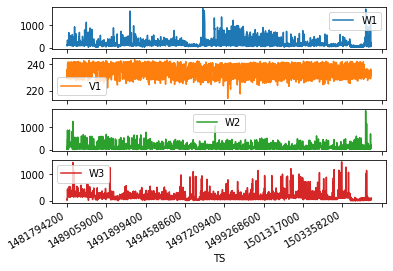

In [416]:
df.set_index('TS')[['W1','V1','W2','W3']].plot(subplots=True)

In [418]:
df_input=df.iloc[:,[4,1,5,6]]
df_input

,W1,V1,W2,W3
1,115.436300,232.629286,64.306541,38.469765
2,80.055340,233.379785,12.996327,64.990385
4,73.737801,229.061954,36.306355,37.953893
5,74.495938,231.506477,146.169413,39.201580
6,75.767461,235.938781,160.391839,40.026790
...,...,...,...,...
4663,137.192589,235.441763,105.633668,57.933859
4664,208.269207,232.340915,204.173027,102.993996
4665,146.752480,231.533768,164.771038,114.729862
4666,67.945832,231.580498,55.652969,112.263540


In [333]:
drp=df_input.query("W1<0.01")
drp

,W1,W2,W3


In [419]:
scaler=preprocessing.MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [420]:
features=data_scaled
target=data_scaled[:,0]

In [421]:
tf.keras.preprocessing.sequence.TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]



(array([[[0.06040589, 0.63134748, 0.03168499, 0.01971207],
         [0.04005688, 0.65692723, 0.00174593, 0.03808683]]]),
 array([0.03642341]))

In [422]:
x_train,x_test,y_train,y_test =model_selection.train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False) 

In [423]:
x_train.shape

(3095, 4)

In [341]:
x_test.shape

(865, 3)

In [424]:
win_length=24
num_features=4
batch_size=7
train_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [ ]:
train_generator[0]

In [427]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.LSTM(units=128,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.LSTM(units=64))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(1,activation='relu'))
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.20)
opt=tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [428]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(optimizer=opt,loss='mse',metrics=[tf.metrics.MeanAbsoluteError()])
his=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])
model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
439/439 [==============================] - 10s 13ms/step - loss: 0.3670 - mean_absolute_error: 0.3642 - val_loss: 0.4868 - val_mean_absolute_error: 0.6496
Epoch 2/50
439/439 [==============================] - 5s 11ms/step - loss: 0.1710 - mean_absolute_error: 0.2442 - val_loss: 0.0108 - val_mean_absolute_error: 0.0735
Epoch 3/50
439/439 [==============================] - 5s 11ms/step - loss: 0.1308 - mean_absolute_error: 0.2104 - val_loss: 0.0637 - val_mean_absolute_error: 0.1186
Epoch 4/50
439/439 [==============================] - 5s 11ms/step - loss: 0.1043 - mean_absolute_error: 0.1920 - val_loss: 0.0917 - val_mean_absolute_error: 0.1501
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 24, 128)           68096     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 24, 128)        

In [429]:
model.evaluate_generator(test_generator,verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.09174934029579163, 0.15010741353034973]

In [430]:
predicts=model.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [431]:
predicts.shape

(750, 1)

In [ ]:
predicts

In [ ]:
y_test

In [432]:
x_test

array([[0.24761795, 0.67372179, 0.02192526, 0.11777488],
       [0.06884921, 0.88913631, 0.02162052, 0.100544  ],
       [0.05960741, 0.75774248, 0.0372386 , 0.10505921],
       ...,
       [0.07841708, 0.5940082 , 0.09030513, 0.07254874],
       [0.03309222, 0.59560094, 0.02663571, 0.07083995],
       [0.05692172, 0.6250627 , 0.03622437, 0.06549627]])

In [433]:
x_test[:,1:][win_length:]

array([[0.54162701, 0.05912702, 0.10604421],
       [0.69026481, 0.0465728 , 0.10348884],
       [0.56743595, 0.06888438, 0.05167636],
       ...,
       [0.5940082 , 0.09030513, 0.07254874],
       [0.59560094, 0.02663571, 0.07083995],
       [0.6250627 , 0.03622437, 0.06549627]])

In [434]:
df_pred=pd.concat([pd.DataFrame(predicts),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [400]:
df_pred

,0,0,1
0,0.0,0.059127,0.106044
1,0.0,0.046573,0.103489
2,0.0,0.068884,0.051676
3,0.0,0.065157,0.093021
4,0.0,0.036358,0.090657
...,...,...,...
745,0.0,0.055799,0.033198
746,0.0,0.113296,0.064418
747,0.0,0.090305,0.072549
748,0.0,0.026636,0.070840


In [435]:
revt=scaler.inverse_transform(df_pred)

In [323]:
revt

array([[1.12911863e-01, 8.32428737e+01, 8.31384502e+01],
       [1.12911863e-01, 1.69012240e+02, 1.51049109e+02],
       [1.12911863e-01, 1.16833931e+02, 1.39312881e+02],
       ...,
       [1.12911863e-01, 1.64771038e+02, 1.14729862e+02],
       [1.12911863e-01, 5.56529687e+01, 1.12263540e+02],
       [1.12911863e-01, 7.20862300e+01, 1.04550903e+02]])

In [436]:
df_final=df_input[predicts.shape[0]*-1:]

In [437]:
df_final.count()

W1    750
V1    750
W2    750
W3    750
dtype: int64

In [438]:
df_final['Predictions']=revt[:,0].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
df_final

,W1,V1,W2,W3,Predictions
3414,106.432337,229.996927,111.337295,163.074463,10.408151
3415,111.234729,234.357895,89.821604,159.386256,10.408151
3416,355.436123,230.754150,128.059677,84.604379,10.408151
3417,132.552967,229.919147,121.671129,144.277232,10.408151
3418,144.938692,230.682294,72.315603,140.865814,10.408151
...,...,...,...,...,...
4663,137.192589,235.441763,105.633668,57.933859,10.408151
4664,208.269207,232.340915,204.173027,102.993996,10.408151
4665,146.752480,231.533768,164.771038,114.729862,10.408151
4666,67.945832,231.580498,55.652969,112.263540,10.408151


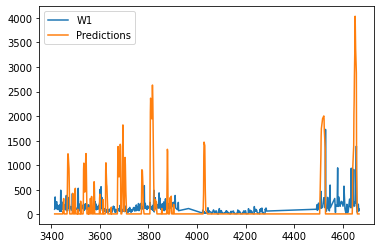

In [442]:
df_final[['W1','Predictions']].plot()